In [1]:
import warnings
warnings.filterwarnings("ignore")

OBJECTIVE: In this Part 02 of the HW4, we will focus on advanced techniques such as regularization in the Logistic Regression classification algorithm."


# Part I: Load Dataset and Explore (Total: 06)

1) Load in the dataset `student.csv` into a pandas dataframe

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('student.csv', index_col=0)
data.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [3]:
#convert default and student into categorical variables - use built-in one-hot encoding


#YOUR CODE
data = pd.get_dummies(data,columns = ['default','student'])

# DONT MODIFY BELOW CODE
data = data.drop('default_No', axis=1)
data = data.drop('student_No', axis=1)


data.head()

,balance,income,default_Yes,student_Yes
1,729.526495,44361.625074,False,False
2,817.180407,12106.134700,False,True
3,1073.549164,31767.138947,False,False
4,529.250605,35704.493935,False,False
5,785.655883,38463.495879,False,False


3) 3.1. Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no.  (2 pts)

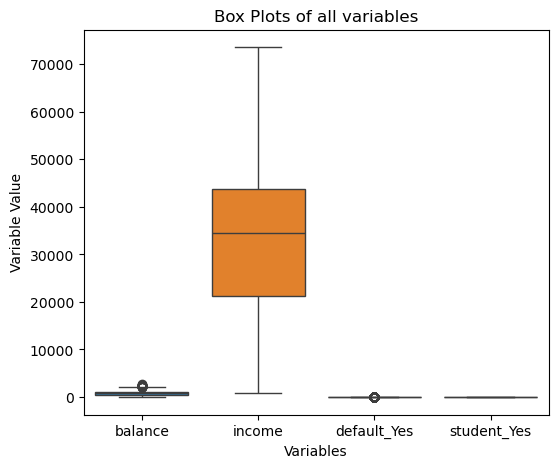

In [4]:
#make boxplots of all variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5),dpi=100)
sns.boxplot(data=data)
plt.title("Box Plots of all variables")
plt.xlabel('Variables')
plt.ylabel('Variable Value')
plt.show()

3) 3.2. make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no. (2 pts)

In [5]:
data['default_Yes']

1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Name: default_Yes, Length: 10000, dtype: bool

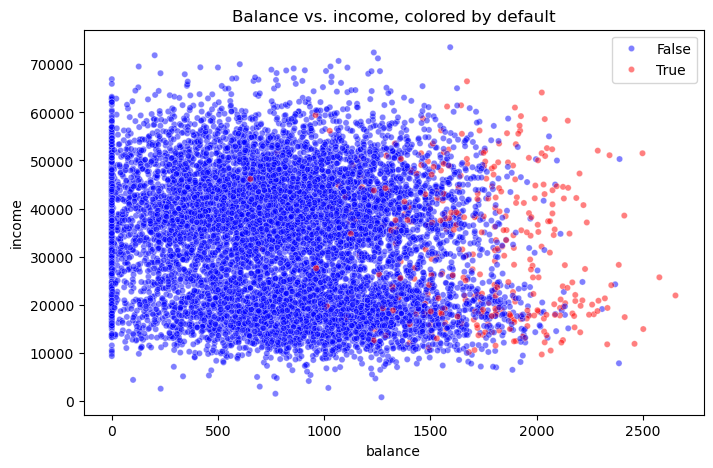

In [6]:
#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no

#YOUR CODE
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=data,x='balance',y='income',hue='default_Yes',palette={True: 'red', False: 'blue'},alpha = 0.5,s=20)
plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

# Part II: Train a Logistic Regression Model  (Total: 22)

4.1) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Add "penalty='l2'" while creating object for LogisticRegression. (pts: 06)

In [7]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#only student data
student_data = data[data['student_Yes']==1]

X = student_data[['balance', 'income']]
y = student_data['default_Yes']

#use train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
#YOUR CODE

#train Logistic Regression model using penalty='l2'
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

#make predictions on testing
y_pred = model.predict(X_test)
#YOUR CODE

In [8]:
X_test.shape

(884, 2)

In [9]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       838
        True       0.79      0.33      0.46        46

    accuracy                           0.96       884
   macro avg       0.88      0.66      0.72       884
weighted avg       0.96      0.96      0.95       884



4.2) Plot the decision boundary in the scatter plot you made in 3)(pts: 03).

In [10]:
coefficients = model.coef_[0]  # Coefficients for the features
intercept = model.intercept_[0] 

In [11]:
model.coef_[0],model.intercept_[0] 

(array([5.71034080e-03, 1.23477115e-05]), -11.785938490177433)

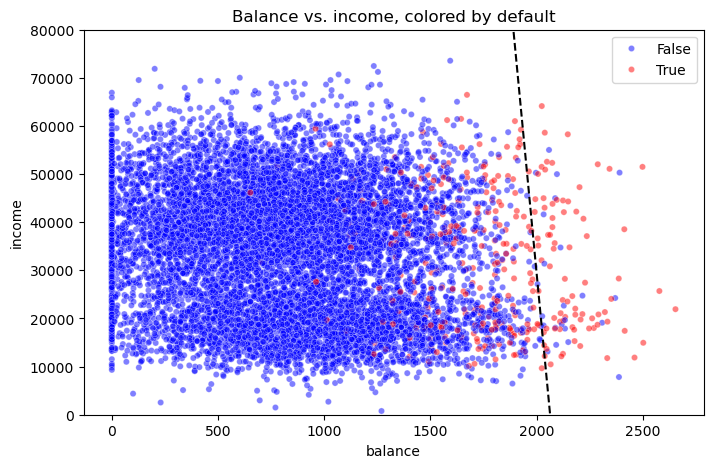

In [12]:
#plot decision boundary - specify line

#calculate slope and intercept
coef = model.coef_[0]
intercept = model.intercept_[0]

slope = -coef[0] / coef[1]
intercept = intercept / coef[1]

#DONE MODIFY BELOW CODE
x_points = np.linspace(1500, 2600, 2000)
y_points = slope*x_points - intercept

#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no

# your code
plt.figure(figsize=(8,5),dpi=100)

sns.scatterplot(data=data,x='balance',y='income',hue='default_Yes',palette={True: 'red', False: 'blue'},alpha = 0.5,s=20)
plt.plot(x_points, y_points, color='black', linestyle='--')

plt.ylim(0, 80000)
plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

In [13]:
slope,intercept

(-462.46146884312066, -954503.8756375546)

4.3) Now, compute the AUC ROC and plot it. (pts: 03)

In [14]:
#function for plotting ROC - DONT MODIFY CODE
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

0.9325256822662654


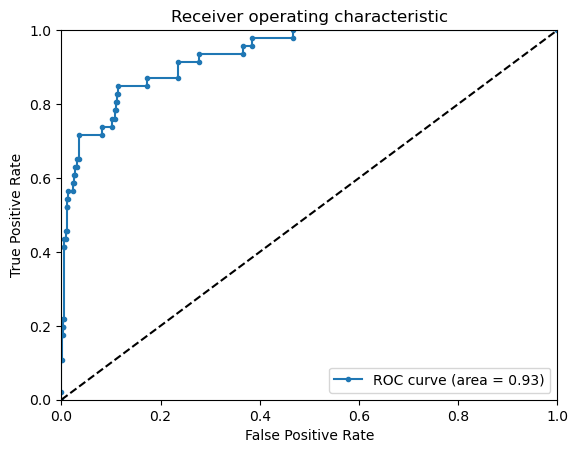

In [15]:
import sklearn.metrics
from sklearn.metrics import roc_curve, auc

# Generate ROC for LR with l2 penalty
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

print(roc_auc)
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) [4.1 to 4.3] but with the student variable included. (pts: 10)

In [16]:
X = data[['balance', 'income', 'student_Yes']]
y = data['default_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#train Logistic Regression model using penalty='l2'
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2906
        True       0.69      0.27      0.38        94

    accuracy                           0.97      3000
   macro avg       0.84      0.63      0.69      3000
weighted avg       0.97      0.97      0.97      3000



In [18]:
model.coef_[0],model.intercept_[0]

(array([ 5.78857147e-03,  5.82361683e-06, -4.67458505e-01]),
 -11.108164393219928)

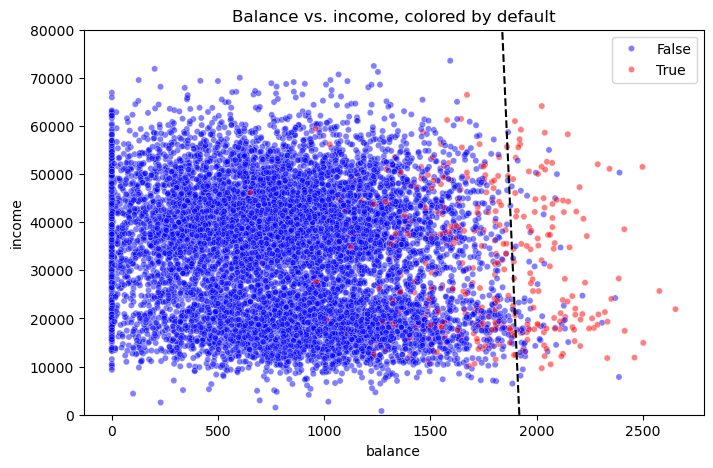

In [19]:
#calculate slope and intercept
coef = model.coef_[0]
intercept = model.intercept_[0]

slope = -coef[0] / coef[1]
intercept = intercept / coef[1]

#DONE MODIFY BELOW CODE
x_points = np.linspace(1500, 2600, 2000)
y_points = slope*x_points - intercept

#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no

# your code
plt.figure(figsize=(8,5),dpi=100)

sns.scatterplot(data=data,x='balance',y='income',hue='default_Yes',palette={True: 'red', False: 'blue'},alpha = 0.5,s=20)
plt.plot(x_points, y_points, color='black', linestyle='--')
plt.ylim(0, 80000)

plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

Area under the ROC curve : 0.946959


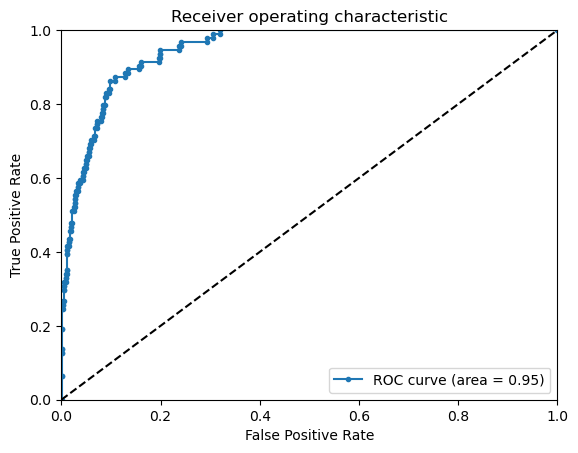

In [20]:
#compute AUC ROC
import sklearn.metrics
from sklearn.metrics import roc_curve, auc

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

We observe that the performance remains stable with the addition of a new variable, as indicated by our AUC ROC consistently hovering around 0.95.

# Part 03: Explore Regularization Strengths  (Total: 12)

Next, we will apply Ridge regularization (L2 penalty) with varying strengths to further evaluate our model.

6) (5 pts)
* We will explore different regularization strengths using the 'C' values. The C value controls the strength of the regularization: smaller values of C imply stronger regularization (more penalty), while larger values allow the model to fit the training data more closely (less penalty).

* Add "penalty='l2'" and "C" Value while creating object for LogisticRegression.






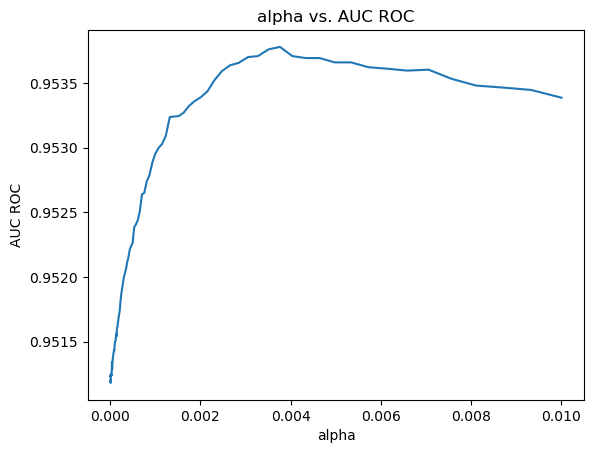

Optimal C value for logistic regression: 0.0037649358067924675
CPU times: total: 9.23 s
Wall time: 1.56 s


In [21]:
%%time
from sklearn.metrics import roc_curve, auc
#optimize using ridge regression - incorporate L2 penalty into logistic regression

# Define a range of regularization strengths (C values)
C_vals = np.logspace(-5,-2,100)

scores = []

X = data[['balance', 'income', 'student_Yes']]
y = data['default_Yes']

#scale data - to find feature importance down below
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=7)

# Loop through each C value to evaluate model performance
for C_val in C_vals:


    # Initialize logistic regression model with L2 penalty (Ridge regression) using the current C value
    regr = LogisticRegression(penalty='l2', C=C_val, random_state=42)

    # Fit the model to the training data
    regr.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_scores = regr.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Append the AUC score to the scores list for later analysis
    scores.append(roc_auc)

#plot alphas vs. scores
plt.plot(C_vals, scores)
plt.xlabel('alpha')
plt.ylabel('AUC ROC')
plt.title('alpha vs. AUC ROC')
plt.show()

bestScore = -1
for i in range(len(scores)):
    if scores[i] > bestScore:
        C_best = C_vals[i]
        bestScore = scores[i]
# C_best,bestScore

print('Optimal C value for logistic regression: ' + str(C_best))

6) Now, compute the coefficients of the logistic regression model using the optimal C value that your have found.  (3 pts)

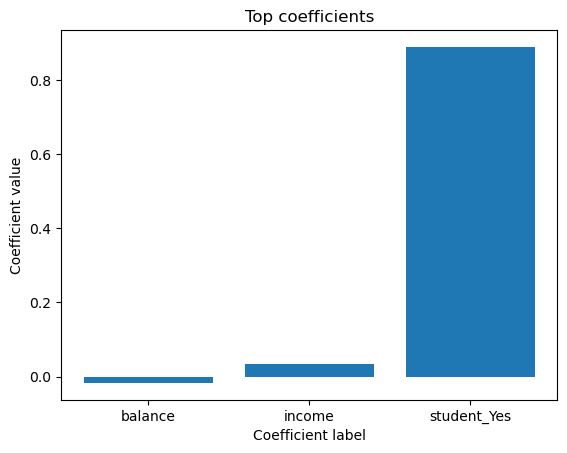

array([-0.01678477,  0.03470062,  0.88999523])

In [22]:
#compute coefficients - Fit the model on the training data and calculate coefficients
regr = LogisticRegression(penalty='l2', C=C_best)
regr.fit(X_train,y_train)
coeffs = np.array(regr.coef_)

#Next sort and plot coefficients
coeffs = np.sort(coeffs)

plt.bar(np.array([0,1,2]), coeffs[0])
plt.xlabel('Coefficient label')
plt.xticks(np.array([0,1,2]), X.columns.values)
plt.ylabel('Coefficient value')
plt.title('Top coefficients')
plt.show()
coeffs[0]

Questions  (2 pts): Which coefficient is the most important for predicting the outcome: balance, income, or student_Yes? Check from above plot.


ANSWER: The coefficient for student_Yes (0.88999523) has the largest absolute value, indicating it has the strongest impact on the predicted outcome compared to balance and income.

7) Final Part, now, using 5 fold cross validation, check that the logistic regression model you built in using penalty l2 and optimal C value is robust (generalizes to other random folds of the dataset).  (2 pts)

[0.94212278 0.93219921 0.93398669 0.95126048 0.97312648]


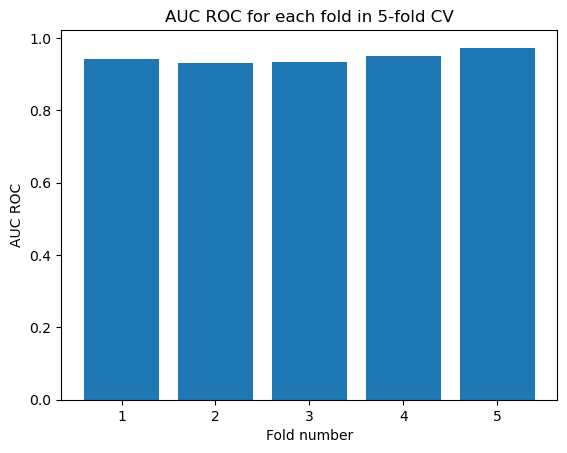

In [23]:
#can also use built in sklearn function
from sklearn.model_selection import cross_val_score

# cross validation
regr = LogisticRegression(penalty='l2', C=C_best)
regr.fit(X_train, y_train)

scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='roc_auc') # modify this code
print(scores)
plt.bar(range(1,6),scores)
plt.title('AUC ROC for each fold in 5-fold CV')
plt.xlabel('Fold number')
plt.ylabel('AUC ROC')
plt.show()

What observations can you make about the model's ability to generalize to random subsets of the data, considering the AUC ROC scores?  (2 pts)

Answer: The AUC-ROC scores across the 5 folds are consistent and high, ranging from approximately 0.932 to 0.973. This indicates that the model has strong predictive performance. The small variation among the scores suggests that the model would generalizes well to different random subsets of the data. These results show that the model is robust and reliable in classifying the outcome.

# ------------ THE END --------------